In [2]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

df=pd.read_excel('전처리_final.xlsx')
df['cleaned_materiality'] = df['cleaned_materiality'].fillna('')
corpus=df['cleaned_materiality']

In [3]:
temp_ma=[i.split() for i in df.cleaned_materiality.to_list()]
print(temp_ma[0])

['business', 'progress', 'transparent', 'manner', 'sustainability', 'sustainability', 'management', 'expert', 'ysis', 'level', 'impact', 'business', 'impact', 'samsung', 'reputation', 'material', 'materiality', 'assessment', 'matrix', 'material', 'expert', 'review', 'pool', 'tcfd', 'gri', 'sasb', 'sustainability', 'issue', 'sustainability', 'management', 'company', 'sustainability', 'analysis', 'stakeholder', 'business', 'impact', 'impact', 'industry', 'industry', 'government', 'business', 'impact', 'assess', 'impact', 'samsung', 'review', 'company', 'manage', 'ment', 'sustainability', 'center', 'review', 'sustainability', 'materiality', 'assessment', 'compliance', 'governance', 'climate', 'change', 'strategy', 'energy', 'management', 'economy', 'management', 'community', 'development', 'citizenship', 'stakeholder', 'engagement', 'use', 'technology', 'accessibility', 'diversity', 'health', 'safety', 'labor', 'labor', 'section', 'company', 'compliance', 'company', 'governance', 'environ

In [4]:
def flatten(l):
    flatlist=[]
    for elem in l:
        if type(elem) ==list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [5]:
word_list=flatten(temp_ma)
word_list=pd.Series([x for x in word_list if len(x)>2]) #한글자는  제외

In [6]:
print(word_list.value_counts().head(10), end=" ")

management        513
business          249
sustainability    239
materiality       197
impact            179
analysis          147
assessment        124
issue             118
safety            103
stakeholder        93
dtype: int64 

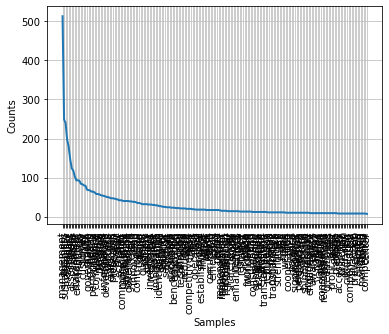

In [7]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(word_list)
text.plot(200)
plt.show()

In [8]:
tfidf_matrix = tfidf.fit_transform(corpus)
print(tfidf_matrix.shape)

(50, 958)


In [10]:

print(tfidf.vocabulary_)

{'business': 99, 'progress': 679, 'transparent': 906, 'manner': 535, 'sustainability': 861, 'management': 533, 'expert': 351, 'ysis': 957, 'level': 513, 'impact': 447, 'samsung': 779, 'reputation': 740, 'material': 546, 'materiality': 547, 'assessment': 62, 'matrix': 548, 'review': 764, 'pool': 642, 'tcfd': 871, 'gri': 410, 'sasb': 781, 'issue': 490, 'company': 159, 'analysis': 43, 'stakeholder': 837, 'industry': 460, 'government': 406, 'assess': 61, 'manage': 532, 'ment': 557, 'center': 116, 'compliance': 169, 'governance': 405, 'climate': 141, 'change': 125, 'strategy': 844, 'energy': 318, 'economy': 300, 'community': 158, 'development': 254, 'citizenship': 137, 'engagement': 320, 'use': 917, 'technology': 876, 'accessibility': 6, 'diversity': 280, 'health': 422, 'safety': 777, 'labor': 505, 'section': 794, 'environment': 327, 'responsibility': 755, 'supply': 858, 'chain': 122, 'ehs': 309, 'inclusion': 452, 'privacy': 667, 'security': 798, 'collaboration': 145, 'information': 463, 'd

In [11]:
for (key, value) in sorted(tfidf.vocabulary_.items(), 
                            key=lambda x: x[1],reverse=True):
    print(key, ":", value)

ysis : 957
youth : 956
yearbook : 955
year : 954
world : 953
workplacebuild : 952
workplace : 951
working : 950
work : 949
win : 948
whistleblowing : 947
welfare : 946
wef : 945
webzine : 944
weather : 943
wealth : 942
way : 941
water : 940
wastewater : 939
waste : 938
wage : 937
vpn : 936
voting : 935
volunteer : 934
voice : 933
vocs : 932
voc : 931
visit : 930
vision : 929
video : 928
verify : 927
verification : 926
venture : 925
vantage : 924
value : 923
valuation : 922
validity : 921
validation : 920
utilization : 919
user : 918
use : 917
usage : 916
uplus : 915
ungc : 914
understanding : 913
uncertainty : 912
type : 911
trust : 910
trend : 909
treatment : 908
transport : 907
transparent : 906
transparency : 905
transition : 904
transformation : 903
transfer : 902
transaction : 901
training : 900
traffic : 899
trading : 898
trade : 897
track : 896
tour : 895
total : 894
topics : 893
topic : 892
today : 891
tobacco : 890
tire : 889
timm : 888
time : 887
tier : 886
thegri : 885
thatt

In [13]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['종목명']).drop_duplicates()
print(indices.head(10))

종목명
삼성전자        0
SK하이닉스      1
NAVER       2
삼성바이오로직스    3
카카오         4
삼성SDI       5
기아          6
POSCO       7
현대모비스       8
삼성물산        9
dtype: int64


In [14]:
print(list(df['종목명']))

['삼성전자', 'SK하이닉스', 'NAVER', '삼성바이오로직스', '카카오', '삼성SDI', '기아', 'POSCO', '현대모비스', '삼성물산', 'SK텔레콤', 'KB금융', 'LG생활건강', 'SK바이오사이언스', '신한지주', 'SK', '한국전력', 'HMM(현대상선)', '삼성생명', '삼성전기', '하나금융지주', '삼성에스디에스', '포스코케미칼', 'S-Oil', '대한항공', 'KT&G', '두산중공업', '아모레퍼시픽', '삼성화재', '현대중공업', '롯데케미칼', '한온시스템', 'KT', '우리금융지주', '기업은행', '한국조선해양', 'LG디스플레이', '현대글로비스', 'LG유플러스', '현대건설', '코웨이', '미래에셋증권', '한국타이어앤테크놀로지', '삼성엔지니어링', 'LG이노텍', '현대중공업지주', '한미사이언스', 'DB손해보험', '삼성증권', '한진칼']


In [17]:
def get_similar(title, cosine_sim = cosine_sim):
    idx = indices[title]
    
    # 모든 문서에 대해서 해당 문서의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 유사도에 따라 문서들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 가장 유사한 5개의 문서를 받아온다.
    sim_scores = sim_scores[1:11]
    
    # 가장 유사한 10개의 회사의 인덱스를 받아온다.
    company_indices = [i[0] for i in sim_scores]
    
    # 가장 유사한 10개의 문서의 회사명을 리턴한다.
    return df['종목명'].iloc[company_indices], company_indices

In [18]:
get_similar('한진칼')[1][0]

24

In [20]:
outer=[]

for i in df['종목명']:
    inner=[]
    tmp=get_similar(i)[1][0]
    for k in range(50):
        if k != tmp:
            inner.append(0)
        else:
            inner.append(1)
    outer.append(inner)

In [35]:
similarity_matrix=pd.DataFrame(data=outer, index=df['종목명'], columns=df['종목명'])

In [36]:
similarity_matrix.to_excel('similarity_matrix_materiality.xlsx')